# Spatal Join using Python

This exercise is inspired from [Performing Spatial Joins](http://www.qgistutorials.com/en/docs/3/performing_spatial_joins.html)

**Import Libraries** 

1. *geopandas*   - Spatail Data Frame. 
2. *matplotlib*  - Plotting.  
3. *contextily*  - Load base map.  
4. *os*          - Path generator.  

In [188]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
import os

Read the *rating* shapefile. GeoPandas `read_file` method will allow us to read the vector file's directly as GeoDataFrames. This shapefile contains the street pavement ratings of Borough district in the USA. To download a copy of this data visit [Street Pavement Rating](https://data.cityofnewyork.us/Transportation/Street-Pavement-Rating/2cav-chmn). Then click Export -> Original

In [174]:
path1 = os.path.join('data', 'dot_V_SSS_SEGMENTRATING_1_20211110', 'dot_V_SSS_SEGMENTRATING_1_20211110.shp')
rating = gpd.read_file(path1)
rating

SegmentID  Length  Width UsageClass  Hagstrom  Bus  Truck  Rating_B  \
0             16   151.0  30.00       None         0    0      0         8   
1             30   235.0  33.58          L         0    0      0         8   
2             47   327.0  30.00       None         0    0      0         0   
3             63   295.0  30.00       None         0    0      0         9   
4             65   256.0  61.83          P         1    1      1         8   
...          ...     ...    ...        ...       ...  ...    ...       ...   
81204     101128   416.0  32.42          L         0    0      0         9   
81205     101137   153.0  24.58          L         0    0      0         8   
81206     101139   227.0  32.08          L         0    0      0         8   
81207     101164   276.0  38.92          L         0    0      0         8   
81208     101173   589.0  30.00          L         0    0      0         8   

      RatingWord  RatingDate  RatingFY_S  Shape_Leng  \
0           GOOD  2019-03-12        2019  134.372616   
1           GOOD  2019-03-12        2019  214.704448   
2             NR        None           0  275.535842   
3           GOOD  2017-07-20           0  294.491086   
4           GOOD  2018-03-06        2018  241.323434   
...          ...         ...         ...         ...   
81204       GOOD  2018-02-03        2018  103.406963   
81205       GOOD  2021-07-28        2022  170.922714   
81206       GOOD  2019-03-11        2019  256.797586   
81207       GOOD  2019-10-10        2020  259.724854   
81208       GOOD  2021-06-07        2021  660.845670   

                                                geometry  
0      LINESTRING (913554.000 123789.000, 913588.000 ...  
1      LINESTRING (913895.000 124049.000, 913868.000 ...  
2      LINESTRING (914647.000 121285.000, 914711.000 ...  
3      LINESTRING (914346.000 122589.000, 914412.000 ...  
4      LINESTRING (914580.000 122648.000, 914346.000 ...  
...                                                  ...  
81204  LINESTRING (1050950.000 217833.000, 1050983.00...  
81205  LINESTRING (1050402.000 218062.000, 1050403.46...  
81206  LINESTRING (1050381.000 218164.000, 1050634.00...  
81207  LINESTRING (1051301.000 211421.000, 1051545.00...  
81208  LINESTRING (1051319.000 212131.000, 1051545.00...  

[81209 rows x 13 columns]

<AxesSubplot:>

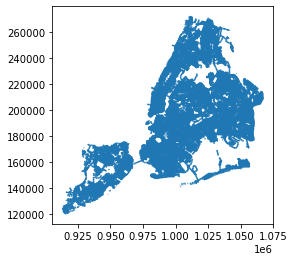

In [175]:
rating.plot()

# A quick visualization of the the data. 

Let's read the Borough district boundary as GeoDataFram. To download a copy of this data visit [Borough Boundaries](https://data.cityofnewyork.us/City-Government/Borough-Boundaries/tqmj-j8zm). Then click Export -> Original. 

In [176]:
path2 = os.path.join('data', 'nybb_21d', 'nybb.shp')
boundary = gpd.read_file(path2)
boundary

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         1      Manhattan  359993.127161  6.366208e+08   
1         2          Bronx  463868.935588  1.187194e+09   
2         3       Brooklyn  728195.194837  1.934174e+09   
3         5  Staten Island  325924.002252  1.623631e+09   
4         4         Queens  900269.281914  3.040206e+09   

                                            geometry  
0  MULTIPOLYGON (((981219.056 188655.316, 980940....  
1  MULTIPOLYGON (((1012821.806 229228.265, 101278...  
2  MULTIPOLYGON (((1022227.320 152028.146, 102207...  
3  MULTIPOLYGON (((970217.022 145643.332, 970227....  
4  MULTIPOLYGON (((1032452.015 154469.237, 103245...

Now Lets visualize the boundary. 

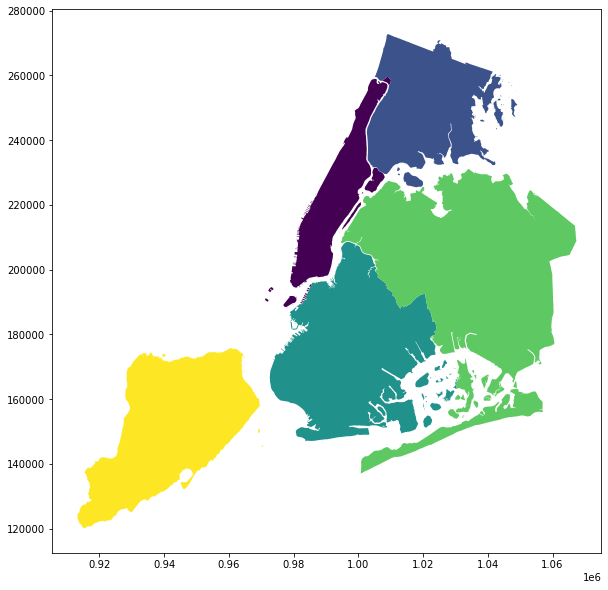

In [177]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,10)
base = boundary.plot(column='BoroCode', ax=ax)

Lets add both the *rating* and *boundary* data in same map. 

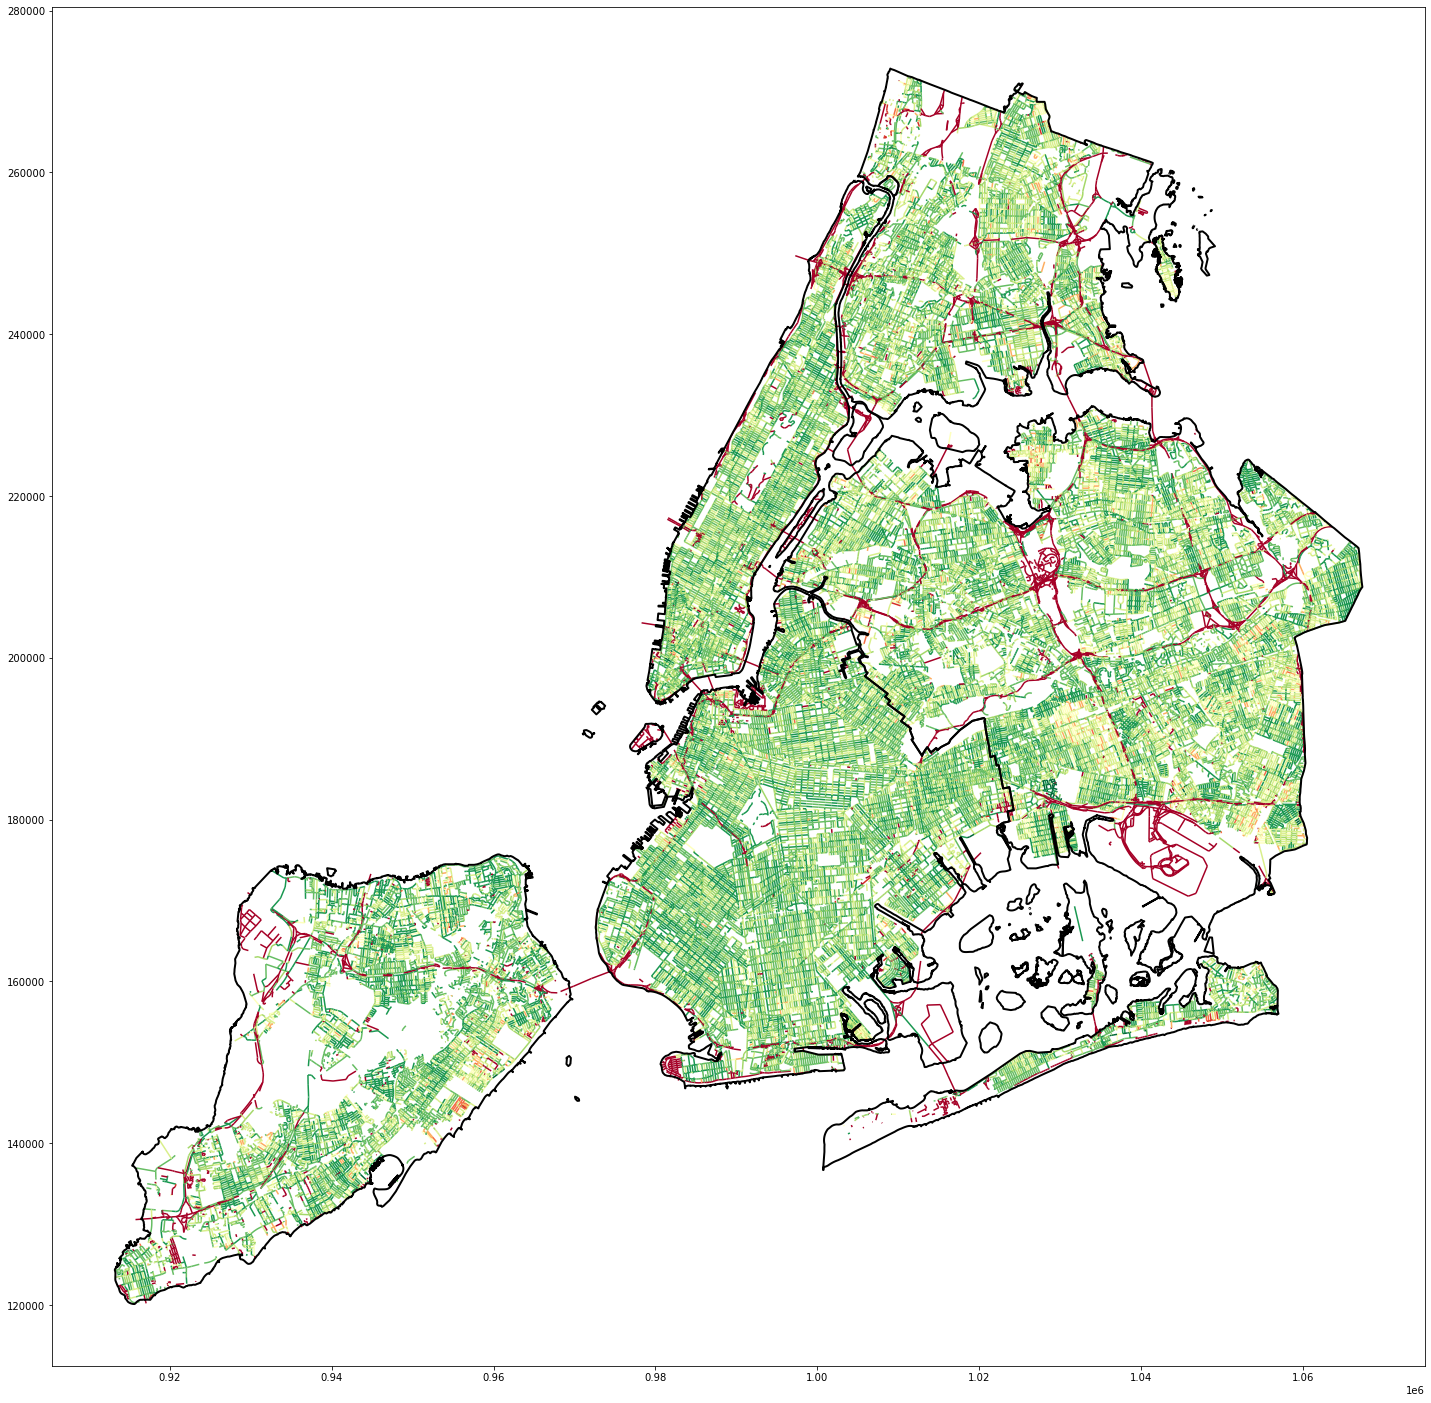

In [178]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(25,25)
rating.plot(column = 'Rating_B', cmap='RdYlGn',ax=ax)
boundary.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 2,ax=ax)
plt.show()

If you have noticed the Left and Bottom axis marking it is evident that the data has no defined Projection. All GeoDataFrames needs to be the assigned with CRS once it is imported. To add the *OpenStreetMap* as basemap, we  need to set the CRS to 3857. The OpenStreetMap WMS layer will be stream in this Coordinate Reference System only. 

In [179]:
rating = rating.to_crs(epsg=3857)
boundary = boundary.to_crs(epsg=3857)

Using the contextily library, lets load the OSM as base map with Stamen TonerLite theam. This basemap will not supress the data but it is very helpful in visualizing with spatial reference. 


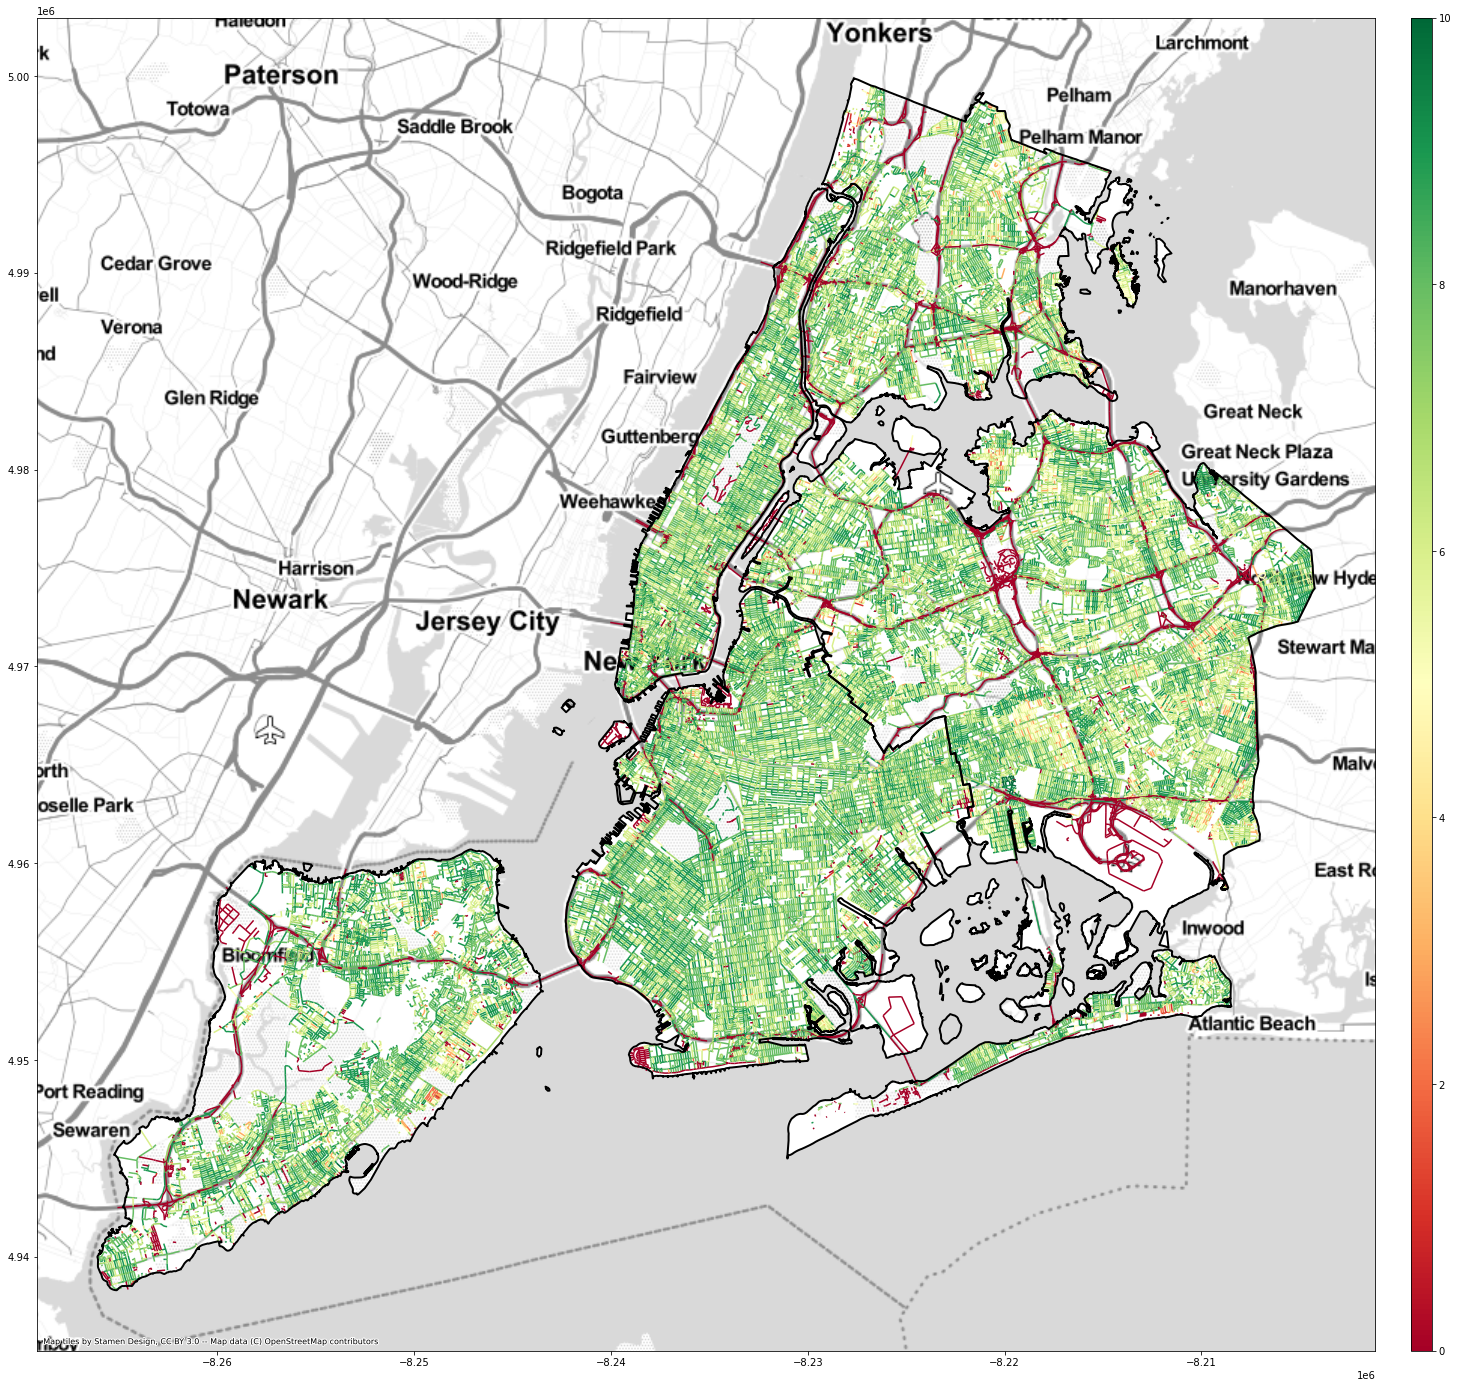

In [180]:
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(25,25)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="1.5%", pad=0.5)

rating.plot(column = 'Rating_B', cmap='RdYlGn',ax=ax, legend=True,cax=cax )
base = boundary.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 2,ax=ax)
cx.add_basemap(base, source=cx.providers.Stamen.TonerLite)

Lets understand the diffrent rating given to each street, from the documentation we can know that **NR** means Not Rated. Which is like No Data. 

In [181]:
rating['RatingWord'].unique()

array(['GOOD', 'NR', 'FAIR', 'POOR'], dtype=object)

Lets remove all the *NR* ratings. 


In [182]:
rating_new = rating[rating['RatingWord'] != 'NR']

We can use .info() to find the total records and the record types. 

In [183]:
rating_new.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 73032 entries, 0 to 81208
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   SegmentID   73032 non-null  int64   
 1   Length      73032 non-null  float64 
 2   Width       73032 non-null  float64 
 3   UsageClass  57669 non-null  object  
 4   Hagstrom    73032 non-null  int64   
 5   Bus         73032 non-null  int64   
 6   Truck       73032 non-null  int64   
 7   Rating_B    73032 non-null  int64   
 8   RatingWord  73032 non-null  object  
 9   RatingDate  73032 non-null  object  
 10  RatingFY_S  73032 non-null  int64   
 11  Shape_Leng  73032 non-null  float64 
 12  geometry    73032 non-null  geometry
dtypes: float64(3), geometry(1), int64(6), object(3)
memory usage: 7.8+ MB


Now lets do the Spatial Join between the ratings and the boundary dataframe. GeoPands has a function called sjoin() to do this. We shall do a inner join so no data loss will occur. 

In [184]:
street_with_BoroName = gpd.sjoin(right_df=rating_new, left_df=boundary, how="inner")
street_with_BoroName

BoroCode   BoroName  Shape_Leng_left    Shape_Area  \
0          1  Manhattan    359993.127161  6.366208e+08   
1          2      Bronx    463868.935588  1.187194e+09   
0          1  Manhattan    359993.127161  6.366208e+08   
0          1  Manhattan    359993.127161  6.366208e+08   
1          2      Bronx    463868.935588  1.187194e+09   
..       ...        ...              ...           ...   
4          4     Queens    900269.281914  3.040206e+09   
4          4     Queens    900269.281914  3.040206e+09   
4          4     Queens    900269.281914  3.040206e+09   
4          4     Queens    900269.281914  3.040206e+09   
4          4     Queens    900269.281914  3.040206e+09   

                                             geometry  index_right  SegmentID  \
0   MULTIPOLYGON (((-8238858.850 4965914.966, -823...        59132      79659   
1   MULTIPOLYGON (((-8226155.123 4982269.863, -822...        59132      79659   
0   MULTIPOLYGON (((-8238858.850 4965914.966, -823...        55155      73138   
0   MULTIPOLYGON (((-8238858.850 4965914.966, -823...        55431      73155   
1   MULTIPOLYGON (((-8226155.123 4982269.863, -822...        55431      73155   
..                                                ...          ...        ...   
4   MULTIPOLYGON (((-8218322.477 4952130.789, -821...        44825      48680   
4   MULTIPOLYGON (((-8218322.477 4952130.789, -821...        43056      48679   
4   MULTIPOLYGON (((-8218322.477 4952130.789, -821...        38048      48530   
4   MULTIPOLYGON (((-8218322.477 4952130.789, -821...        48620      48529   
4   MULTIPOLYGON (((-8218322.477 4952130.789, -821...        38408      48540   

    Length  Width UsageClass  Hagstrom  Bus  Truck  Rating_B RatingWord  \
0    126.0  30.00       None         0    0      0         9       GOOD   
1    126.0  30.00       None         0    0      0         9       GOOD   
0    144.0  30.00       None         0    0      0         7       FAIR   
0    285.0  30.00       None         0    0      0         8       GOOD   
1    285.0  30.00       None         0    0      0         8       GOOD   
..     ...    ...        ...       ...  ...    ...       ...        ...   
4    221.0  42.67          L         0    0      0         8       GOOD   
4     91.0  42.67          S         0    1      0         7       FAIR   
4    157.0  42.67          L         0    0      0         6       FAIR   
4    114.0  42.67          S         0    1      0         6       FAIR   
4    254.0  34.50          L         0    0      0         7       GOOD   

    RatingDate  RatingFY_S  Shape_Leng_right  
0   2017-11-09        2018        219.018264  
1   2017-11-09        2018        219.018264  
0   2020-09-19        2021        137.611773  
0   2019-09-05        2020        163.367683  
1   2019-09-05        2020        163.367683  
..         ...         ...               ...  
4   2021-08-30        2022        164.012195  
4   2021-08-30        2022         98.229324  
4   2021-09-03        2022        153.600130  
4   2021-09-03        2022        106.606754  
4   2019-05-22        2019        138.405202  

[73111 rows x 18 columns]

In the new DataFrame against each street record now the *BoroName* and *BoroCode* is preset, lets group by these coloumn to find which block has a better rating in over all street performance. 

In [185]:
boundary_rating = street_with_BoroName.groupby(['BoroName']).mean()
boundary_rating = boundary_rating[['BoroCode', 'Rating_B']]
boundary_rating

BoroCode  Rating_B
BoroName                         
Bronx               2.0  7.140069
Brooklyn            3.0  7.564270
Manhattan           1.0  7.468418
Queens              4.0  7.216121
Staten Island       5.0  7.462726

But now the geometry column will be lost and this data cannot be use for plotting. So lets do a table join wiht boundary GeoDataFrame. 

In [186]:
boundary_rating_sdf = boundary.merge(boundary_rating, on='BoroCode')
boundary_rating_sdf

BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         1      Manhattan  359993.127161  6.366208e+08   
1         2          Bronx  463868.935588  1.187194e+09   
2         3       Brooklyn  728195.194837  1.934174e+09   
3         5  Staten Island  325924.002252  1.623631e+09   
4         4         Queens  900269.281914  3.040206e+09   

                                            geometry  Rating_B  
0  MULTIPOLYGON (((-8238858.850 4965914.966, -823...  7.468418  
1  MULTIPOLYGON (((-8226155.123 4982269.863, -822...  7.140069  
2  MULTIPOLYGON (((-8222422.158 4951155.921, -822...  7.564270  
3  MULTIPOLYGON (((-8243264.876 4948597.810, -824...  7.462726  
4  MULTIPOLYGON (((-8218322.477 4952130.789, -821...  7.216121

Now we can plot the data as a map and visualite with average rating for each block. 

<AxesSubplot:>

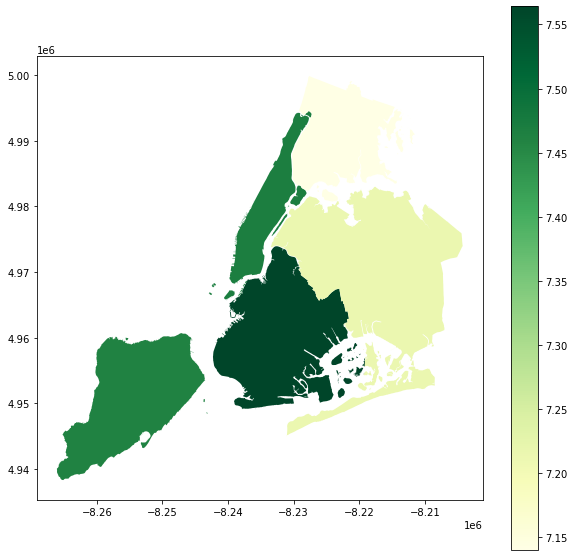

In [187]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,10)
boundary_rating_sdf.plot(column='Rating_B', ax=ax, cmap='YlGn', legend=True)